<a href="https://colab.research.google.com/github/sonjoy2074/ai-chat-log-summarizer/blob/main/research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk
nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

In [10]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

**# 2.1. Chat Log Parsing**

In [ ]:
file_path = '/content/chat.txt'

user_messages = []
ai_messages = []

# Read the file line by line
with open(file_path, 'r', encoding='utf-8') as file:
    for line in file:
        line = line.strip()  # Remove leading/trailing whitespace
        if not line:  # Skip empty lines
            continue

        # Check who the speaker is
        if line.startswith("User:"):
            message = line[len("User:"):].strip()  # Extract message only
            user_messages.append(message)
        elif line.startswith("AI:"):
            message = line[len("AI:"):].strip()
            ai_messages.append(message)

print("User Messages:", user_messages)
print("AI Messages:", ai_messages)


User Messages: ['Hi, can you tell me about Python?', 'What can I use it for?']
AI Messages: ['Sure! Python is a popular programming language known for', 'You can use Python for web development, data analysis,']


In [9]:
count_user=len(user_messages)
count_ai=len(ai_messages)
total_messages=len(user_messages)+len(ai_messages)
print("Total User messages: ",count_user)
print("Total AI messages:",count_ai)
print("Total messages:",total_messages)

Total User messages:  2
Total AI messages: 2
Total messages: 4


In [11]:
all_messages = user_messages + ai_messages
combined_text = " ".join(all_messages)

# Define English stopwords
stop_words = stopwords.words('english')

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words=stop_words)
tfidf_matrix = vectorizer.fit_transform([combined_text])

# Get feature names and scores
feature_names = vectorizer.get_feature_names_out()
scores = tfidf_matrix.toarray()[0]

# Pair each word with its score
word_score_pairs = list(zip(feature_names, scores))

# Sort by score descending and get top 5
top_keywords = sorted(word_score_pairs, key=lambda x: x[1], reverse=True)[:5]

print("\nTop 5 Keywords (TF-IDF):")
for word, score in top_keywords:
    print(f"{word}: {score:.4f}")


Top 5 Keywords (TF-IDF):
python: 0.6124
use: 0.4082
analysis: 0.2041
data: 0.2041
development: 0.2041


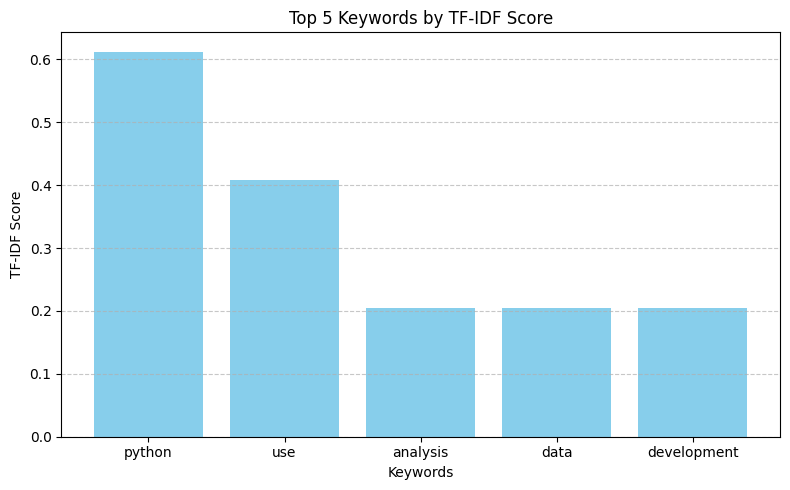

In [13]:
import matplotlib.pyplot as plt

top_words = [word for word, score in top_keywords]
top_scores = [score for word, score in top_keywords]

# Create the bar chart
plt.figure(figsize=(8, 5))
plt.bar(top_words, top_scores, color='skyblue')
plt.title('Top 5 Keywords by TF-IDF Score')
plt.xlabel('Keywords')
plt.ylabel('TF-IDF Score')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [15]:
total_exchanges = min(len(user_messages), len(ai_messages))
keywords = [word for word, score in top_keywords]

first_top_word = keywords[0] if len(keywords) > 0 else "unknown topic"
second_top_word = keywords[1] if len(keywords) > 1 else ""

if second_top_word:
    nature = f"The user asked mainly about {first_top_word} and its {second_top_word}."
else:
    nature = f"The user asked mainly about {first_top_word}."


summary = f"""
Summary:
- The conversation had {total_exchanges} exchanges.
- {nature}
- Most common keywords: {', '.join(keywords)}.
"""
print(summary)



Summary:
- The conversation had 2 exchanges.
- The user asked mainly about python and its use.
- Most common keywords: python, use, analysis, data, development.

